In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
ess_combined = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv")
ess_combined.info()
ess_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null int64
year       8147 non-null int64
tvtot      8147 non-null int64
ppltrst    8147 non-null int64
pplfair    8147 non-null int64
pplhlp     8147 non-null int64
happy      8147 non-null int64
sclmeet    8147 non-null int64
sclact     8147 non-null int64
gndr       8147 non-null int64
agea       8147 non-null int64
partner    8147 non-null int64
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


In [4]:
# Split into 2 DataFrames for ease of analysis

ess_2012 = ess_combined[ess_combined['year']==6]

ess_2014 = ess_combined[ess_combined['year']==7]

print(ess_2012.head())
print(ess_2014.head())

  cntry  idno  year  tvtot  ppltrst  ...  sclmeet  sclact  gndr  agea  partner
0    CH     5     6      3        3  ...        5       4     2    60        1
1    CH    25     6      6        5  ...        3       2     2    59        1
2    CH    26     6      1        8  ...        6       3     1    24        2
3    CH    28     6      4        6  ...        6       2     2    64        1
4    CH    29     6      5        6  ...        7       2     2    55        1

[5 rows x 13 columns]
    cntry  idno  year  tvtot  ppltrst  ...  sclmeet  sclact  gndr  agea  partner
732    CH     5     7      2        8  ...        6       4     1    69        1
733    CH    25     7      4        4  ...        5       3     1    30        1
734    CH    26     7      3        8  ...        7       5     2    49        2
735    CH    28     7      2        7  ...        6       2     1    51        1
736    CH    29     7      2        4  ...        6       2     2    32        2

[5 rows x 13 col

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


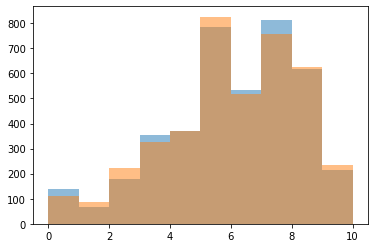

In [5]:
# 1. Did people become less trusting from 2012 to 2014?

plt.hist(ess_2012['ppltrst'], alpha = .5)
plt.hist(ess_2014['ppltrst'], alpha = .5)

# Remember that Shapiro test is sensitive to large samples. 

stats.shapiro(ess_2012['ppltrst'])
stats.shapiro(ess_2014['ppltrst'])

print(stats.describe(ess_2012['ppltrst']))
print(stats.describe(ess_2014['ppltrst']))

In [6]:
stats.ttest_ind(ess_2012['ppltrst'], ess_2014['ppltrst'])

# There is no significant difference in trust between 2012 to 2014

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


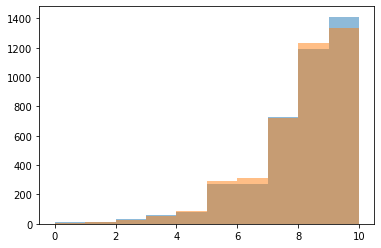

In [8]:
# 2. Did people become happier from 2012 to 2014?

plt.hist(ess_2012['happy'], alpha = .5)
plt.hist(ess_2014['happy'], alpha = .5)

print(stats.describe(ess_2012['happy']))
print(stats.describe(ess_2014['happy']))

In [9]:
stats.kruskal(
    ess_2012['happy'],
    ess_2014['happy'])

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

In [10]:
# 3. Pick 3 or 4 of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

# How many countries are there?
ess_2014['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53619e9f60>,
      dtype=object)

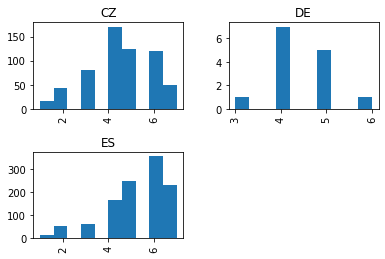

In [12]:
# Pick CZ, DE and ES

filter_list = ['CZ', 'DE', 'ES']
ess_2014_cz_de_es = ess_2014[ess_2014['cntry'].isin(filter_list)]

ess_2014_cz_de_es['cntry'].unique()

ess_2014_cz_de_es['sclmeet'].hist(by = ess_2014_cz_de_es['cntry'])

In [13]:

# These are sparser samples of ordinal data
# So nothing will be perfectly 'normal'
# we will have to "eyeball" it
# Kruskal Wallis test

stats.kruskal(
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'CZ',['sclmeet']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'DE',['sclmeet']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'ES',['sclmeet']])

KruskalResult(statistic=120.72958033262947, pvalue=6.0800161031835895e-27)

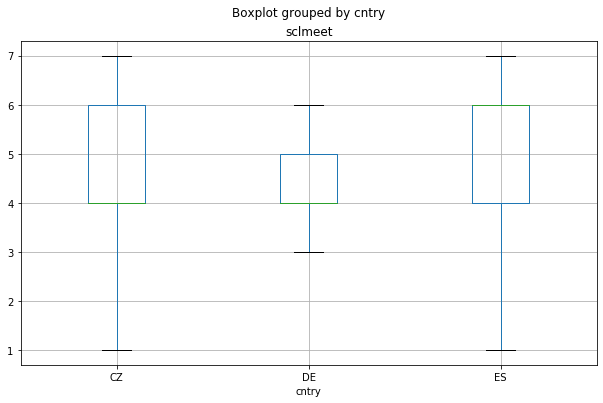

In [14]:
# It appears that not all medians are equal, so
# Which one is the odd country out?
# It seems that DE is the odd country out

ess_2014_cz_de_es.boxplot('sclmeet', by='cntry', figsize=(10, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f536176f160>,
      dtype=object)

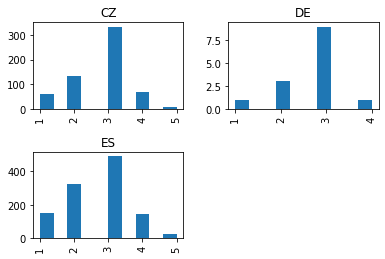

In [15]:
# 4. Pick 3 or 4 of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014.
# Are there differences, and if so, which countries stand out?

# Variable sclact
# I will stick with the same countries as above

ess_2014_cz_de_es['sclact'].hist(by = ess_2014_cz_de_es['cntry'])

# These look a little more normal to me. 
# At least they are symmetrical.
# So let's do a one-way ANOVA.

In [16]:
stats.f_oneway(
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'CZ',['sclact']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'DE',['sclact']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'ES',['sclact']])

# No significant difference in groups.

F_onewayResult(statistic=array([2.28963493]), pvalue=array([0.10160666]))

In [17]:
# Let's check pairwise statistics with Tukey's HSD.

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = ess_2014_cz_de_es['sclact'],      # Data
                          groups = ess_2014_cz_de_es['cntry'],   # Groups
                          alpha=0.05) 


tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CZ,DE,-0.0151,0.9,-0.5946,0.5644,False
CZ,ES,-0.098,0.0841,-0.2058,0.0099,False
DE,ES,-0.0829,0.9,-0.6594,0.4936,False


In [18]:
# Ruff Figural Fluency Test

# https://www.parinc.com/Products/Pkey/360
# https://datadryad.org/resource/doi:10.5061/dryad.rr138

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rfft = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv")
rfft.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


In [19]:
# 1. Is there a significant difference in the number of unique designs drawn by the same participants from Measurement 2 to Measurement 3?

# To ease in our analysis let's pivot the data.

rfft_unique = rfft.pivot(index='Casenr', columns='Measurement', values='Unique')
rfft_unique.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0


DescribeResult(nobs=2515, minmax=(-75.5, 68.5), mean=4.015506958250497, variance=342.2368318331855, skewness=-0.15837265462838976, kurtosis=0.7823714353134701)


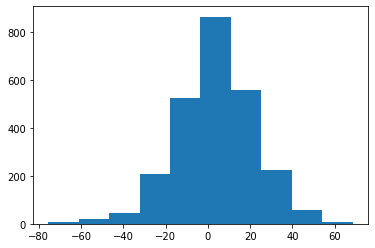

In [20]:
# The differences appear normally distributed.
# So we ill use a paired t-test.

plt.hist(rfft_unique['Measurement 3 (2008-2012)'] - rfft_unique['Measurement 2 (2006-2008)'])
print(stats.describe(rfft_unique['Measurement 3 (2008-2012)'] - rfft_unique['Measurement 2 (2006-2008)']))

In [21]:
stats.ttest_rel(rfft_unique['Measurement 3 (2008-2012)'], rfft_unique['Measurement 2 (2006-2008)'])

# Yes, there appears to be a significant difference between unique designs by the same participants between Measurement 2 and 3.

Ttest_relResult(statistic=10.88544039426271, pvalue=5.3585747477799544e-27)

In [22]:
# 2. Is there a significant difference in the number of perseverative erros drawn by the same participants from Measurement 2 to Measurement 3?

# Again, let's pivot the data

rfft_persev = rfft.pivot(index='Casenr', columns='Measurement', values='Perseverative')
rfft_persev.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


(array([1.821e+03, 4.560e+02, 1.210e+02, 5.200e+01, 2.800e+01, 1.600e+01,
        1.300e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 ]),
 <a list of 10 Patch objects>)

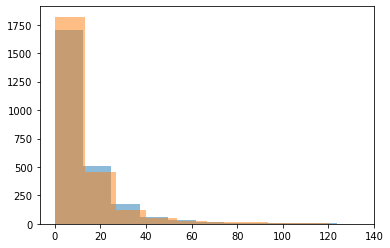

In [23]:
# Looks quite non-normal, so we'll use Wilcoxon

plt.hist(rfft_persev['Measurement 3 (2008-2012)'], alpha = .5)
plt.hist(rfft_persev['Measurement 2 (2006-2008)'], alpha = .5)

In [24]:
# Reject the null, there is a significant difference between perseverative errors
# from the same participants at Measurements 2 and 3

stats.wilcoxon(rfft_persev['Measurement 3 (2008-2012)'], rfft_persev['Measurement 2 (2006-2008)'])

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)